0b1101000011001010110110001101100011011110010000001100011011011110110110101110000


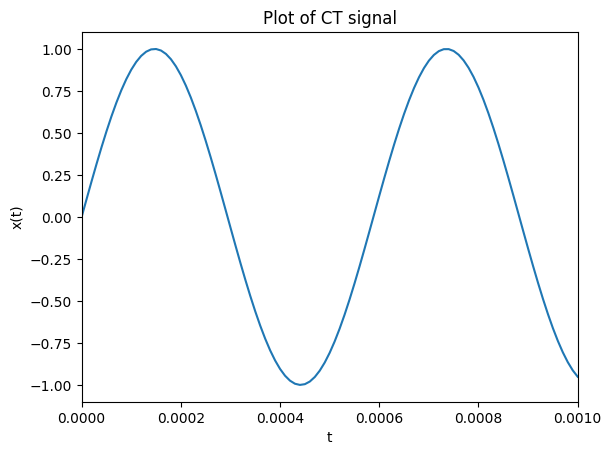

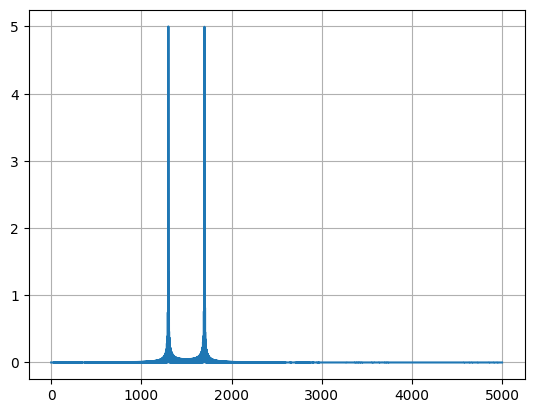

Value in index  1700.0  is 5.00
0b01101000011001010110110001101100011011110010000001100011011011110110110101110000
b'hello comp'


In [18]:
import matplotlib.pyplot as plt
import numpy as np
from math import pi
from scipy.fft import fft, fftfreq
import pandas as pd
import binascii

# -------------------=FUNÇÕES=-------------------


#criação de seno
def cont_sin(time, sample_rate, frequency):
    sample = sample_rate
    f = frequency
    t = np.linspace(time, time + 0.1, sample)
    signal = np.sin(2 * np.pi * f * t)
    return t, signal


# -------------------MODULAÇÃO-------------------

#padrões de frequencia
Fs = 10000
T = 0
fc1 = 1300  #1
fc2 = 1700  #0

#construindo mensagem
ascii_message = 'hello comp'
message = bin(int.from_bytes(ascii_message.encode(), 'big'))
print(message)
len_message = len(ascii_message)

#extraindo o b da mensagem
bin_message = '0' + message[2:]

#cria matriz de amostras do tamanho da mensagem
freq_bin_message = np.zeros(len(bin_message))
len(freq_bin_message)

#preenche vetor freq_bin_message com a frequencia de cada elemento
for i in range(len(bin_message)):
    if bin_message[i] == '1':
        freq_bin_message[i] = fc1
    else:
        freq_bin_message[i] = fc2

#criando sinal
signal = np.zeros(0)
t = np.zeros(0)

#dica: usar hstack do numpy, a função cont_sin() passando como parâmentro a frequência que representa o bit na mensagem
#      e incrementar em 0.1 o valor de T para gerar o deslocamento de tempo de bit em 0,1 segundos
for freq in freq_bin_message:
    time, signal_bit = cont_sin(T, Fs, freq)
    T += 0.1
    t = np.hstack([t, time])
    signal = np.hstack([signal, signal_bit])

plt.plot(t, signal)
plt.xlabel('t')
plt.ylabel('x(t)')
plt.title(r'Plot of CT signal')
plt.xlim([0, 0.001])
plt.show()

N = 80000
T = 1 / 10000

yf = fft(signal)
xf = fftfreq(N, T)[:N // 2]
#import matplotlib.pyplot as plt
plt.plot(xf, 2.0 / N * np.abs(yf[0:N // 2]))
plt.grid()
plt.show()

""" não exibe correto, diferenteça de 10x a frequencia

f = fftfreq(len(signal), T)
frequencias = f[:N // 2]
amplitudes = np.abs(fft(signal))[:N // 2] * 1 / N

print("Value in index ", np.argmax(amplitudes),
      " is %.2f" % amplitudes[np.argmax(amplitudes)])
print("Freq: ", frequencias[np.argmax(amplitudes)])
plt.plot(frequencias, amplitudes)
plt.grid()
plt.xlim([0, 2000])
plt.show()
"""

#----------------------- Demodulador -----------------------

string_demodulada = '0b'  #usar para converter string_demodulada após a conversão de frequências em 0 ou 1
samples_bit = 10000

for bit_position in range(len(freq_bin_message)):
    #capturar uma quantidade de valores do sinal (vetor) dentro do tempo de bit adequado
    signal_result = signal[(samples_bit * bit_position):(samples_bit *
                                                         (bit_position + 1))]

    T = 1 / 100000  # calcular o período de amostragem (1/F sendo F 10000 Hz)
    N = signal_result.size  # pegar a quantidade de amostras do bit

    #aplicar FFT para saber qual é a frequência
    f = fftfreq(len(signal_result), T)
    frequencias = f[:N // 2]
    amplitudes = np.abs(fft(signal_result))[:N // 2] * 1 / N

    #parte onde é verificado se o bit (com uma quantidade de amostras que são usadas para detectar se é 0 ou 1) analisa se é 0 ou 1
    
    #print(frequencias[np.argmax(amplitudes)])
    if frequencias[np.argmax(amplitudes)] == fc2:
        string_demodulada += '0'
    else:
        string_demodulada += '1'
print("Value in index ", frequencias[np.argmax(amplitudes)],
      " is %.2f" % (10 * amplitudes[np.argmax(amplitudes)])) #x10 pois por algum motivo a amplitude ficava 10x menor que o valor do fftfreq
# Converter Mensagem
print(string_demodulada)
n = int(string_demodulada, 2)
binascii.unhexlify('%x' % n)

print(binascii.unhexlify('%x' % n))
